<a href="https://colab.research.google.com/github/kaustav1996/utility_data_analysis/blob/master/commercial_hourly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#PRE CONFIGURE RUNTIME
# !pip install --upgrade Cython
# !pip install --upgrade git+https://github.com/statsmodels/statsmodels
# !pip install pmdarima


Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (0.29.10)
  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-r8kkkbpa
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-r8kkkbpa
  Stored in directory: /tmp/pip-ephem-wheel-cache-_uhism0u/wheels/7d/ad/45/ac1a03bd759c2fa74c486e2b1950d94b55f511b4c2b0418bd5
Successfully built statsmodels
  Found existing installation: statsmodels 0.9.0
    Uninstalling statsmodels-0.9.0:
      Successfully uninstalled statsmodels-0.9.0


     |████████████████████████████████| 921kB 7.0MB/s 
     |████████████████████████████████| 24.8MB 31.1MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.0
    Uninstalling scipy-1.3.0:
      Successfully uninstalled scipy-1.3.0


In [1]:
import os

model_errors=dict()

repo_url = 'https://github.com/kaustav1996/utility_data_analysis'

%cd /content

repo_dir_path = os.path.abspath(os.path.join('.', os.path.basename(repo_url)))

!git clone {repo_url}
%cd {repo_dir_path}
!git pull

%ls

csv_file= os.path.abspath(os.path.join(repo_dir_path,'interval_data_commercial.csv'))

/content
fatal: destination path 'utility_data_analysis' already exists and is not an empty directory.
/content/utility_data_analysis
Already up to date.
analysis_on_csv_data_daily_basis.ipynb  commercial_hourly.ipynb       LICENSE
analysis_on_csv_data.ipynb              interval_data_commercial.csv  README.md
analysis_on_csv_data_monthly.ipynb      interval_data.csv


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
#Importing data
df = pd.read_csv(csv_file)
df=df.fillna(df.mean())
#Printing head
df.head()


,TIME,KW
0,8/29/2018 0:15,0.0
1,8/29/2018 0:30,0.0
2,8/29/2018 0:45,0.0
3,8/29/2018 1:00,0.0
4,8/29/2018 1:15,0.0


In [3]:
df.tail()

,TIME,KW
17891,6/7/2019 3:00,6.25
17892,6/7/2019 3:15,6.25
17893,6/7/2019 3:30,6.25
17894,6/7/2019 3:45,6.25
17895,6/7/2019 4:00,6.25


In [4]:
testtest=df[7790:]
testtest.head()

,TIME,KW
7790,12/31/2018 23:45,2.33
7791,1/1/2019 0:00,3.57
7792,1/1/2019 20:15,16.07
7793,1/1/2019 20:30,12.50
7794,1/1/2019 20:45,10.71


In [5]:
train=df[7791:15679]
test=test=df[15679:]

df.Timestamp = pd.to_datetime(df['TIME'],format='%m/%d/%Y %H:%M') 
df.index = df.Timestamp 
df = df.resample('60T').mean()
train.Timestamp = pd.to_datetime(train['TIME'],format='%m/%d/%Y %H:%M') 
train.index = train.Timestamp 
train = train.resample('60T').mean()
test.Timestamp = pd.to_datetime(test['TIME'],format='%m/%d/%Y %H:%M') 
test.index = test.Timestamp 
test = test.resample('60T').mean()

# train['TIME']=train.index

print(train)

                            KW
TIME                          
2019-01-01 00:00:00   3.570000
2019-01-01 01:00:00        NaN
2019-01-01 02:00:00        NaN
2019-01-01 03:00:00        NaN
2019-01-01 04:00:00        NaN
2019-01-01 05:00:00        NaN
2019-01-01 06:00:00        NaN
2019-01-01 07:00:00        NaN
2019-01-01 08:00:00        NaN
2019-01-01 09:00:00        NaN
2019-01-01 10:00:00        NaN
2019-01-01 11:00:00        NaN
2019-01-01 12:00:00        NaN
2019-01-01 13:00:00        NaN
2019-01-01 14:00:00        NaN
2019-01-01 15:00:00        NaN
2019-01-01 16:00:00        NaN
2019-01-01 17:00:00        NaN
2019-01-01 18:00:00        NaN
2019-01-01 19:00:00        NaN
2019-01-01 20:00:00  13.093333
2019-01-01 21:00:00  10.712500
2019-01-01 22:00:00  14.290000
2019-01-01 23:00:00        NaN
2019-01-02 00:00:00        NaN
2019-01-02 01:00:00        NaN
2019-01-02 02:00:00        NaN
2019-01-02 03:00:00        NaN
2019-01-02 04:00:00        NaN
2019-01-02 05:00:00        NaN
...     

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.


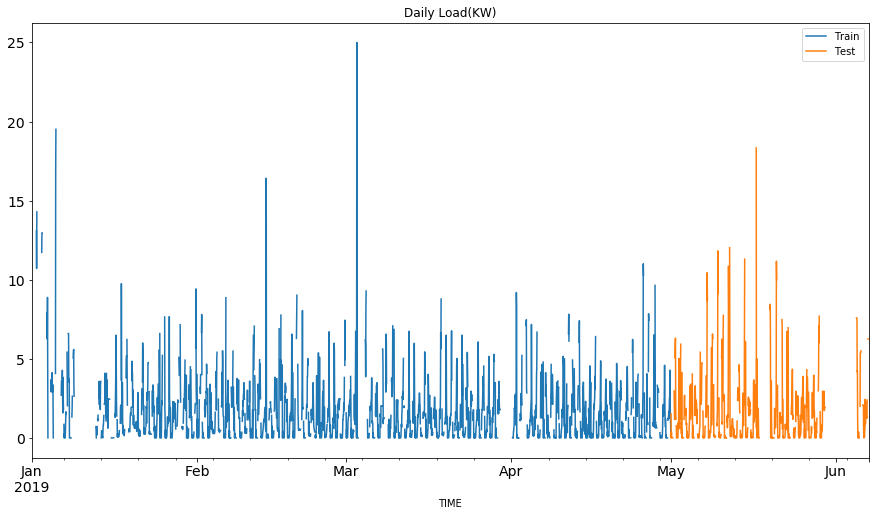

In [6]:
train.KW.plot(figsize=(15,8), title= 'Daily Load(KW)',label='Train' ,fontsize=14)
test.KW.plot(figsize=(15,8), title= 'Daily Load(KW)', label='Test', fontsize=14)
plt.legend(loc='best')
plt.show()


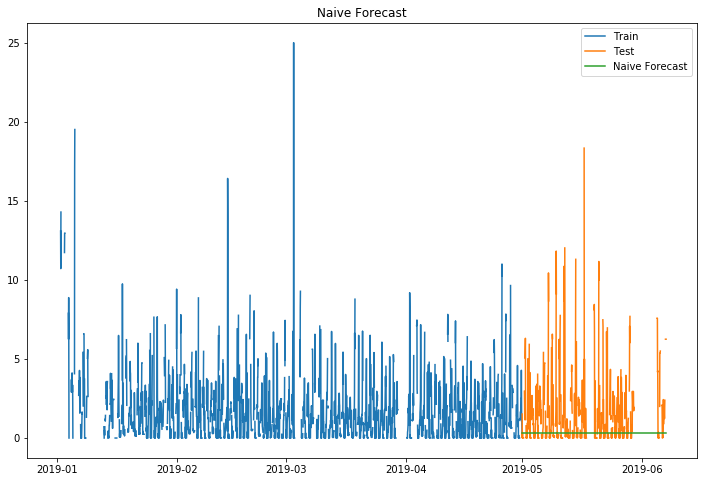

In [7]:
dd= np.asarray(train.KW)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['KW'], label='Train')
plt.plot(test.index,test['KW'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test = test.fillna(test.mean())
rms = sqrt(mean_squared_error(test.KW, y_hat.naive))
print(rms)

model_errors['Naive']=rms

2.225282433683661


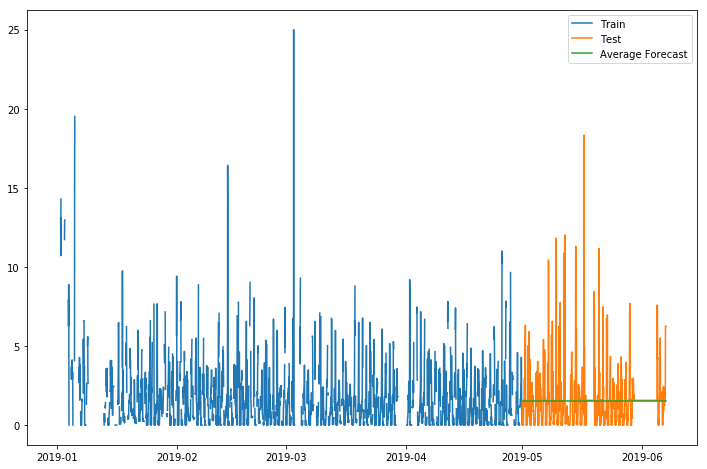

In [9]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['KW'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['KW'], label='Train')
plt.plot(test['KW'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [10]:
rms = sqrt(mean_squared_error(test.KW, y_hat_avg.avg_forecast))
print(rms)

model_errors['Average']=rms

1.8256127142233103


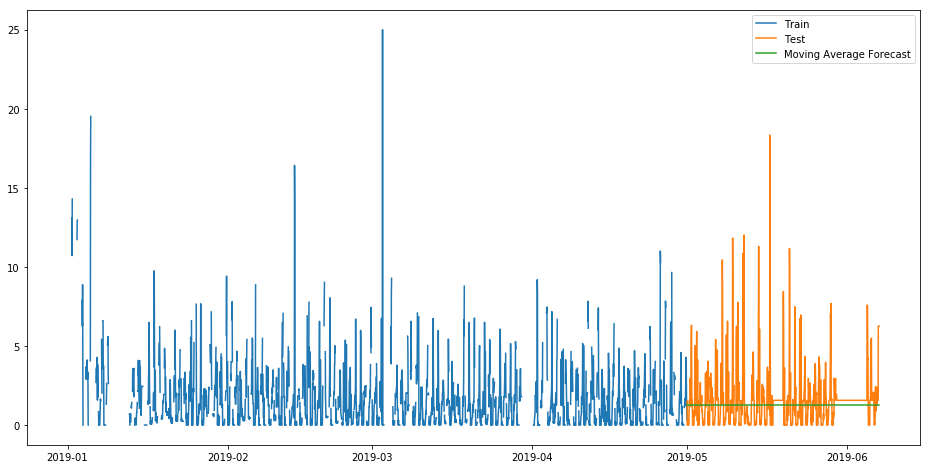

In [11]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['KW'].rolling(4).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['KW'], label='Train')
plt.plot(test['KW'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [12]:
test = test.fillna(test.mean())
rms = sqrt(mean_squared_error(test.KW, y_hat_avg.moving_avg_forecast))
print(rms)

model_errors['Moving Average']=rms

1.8444140443903354


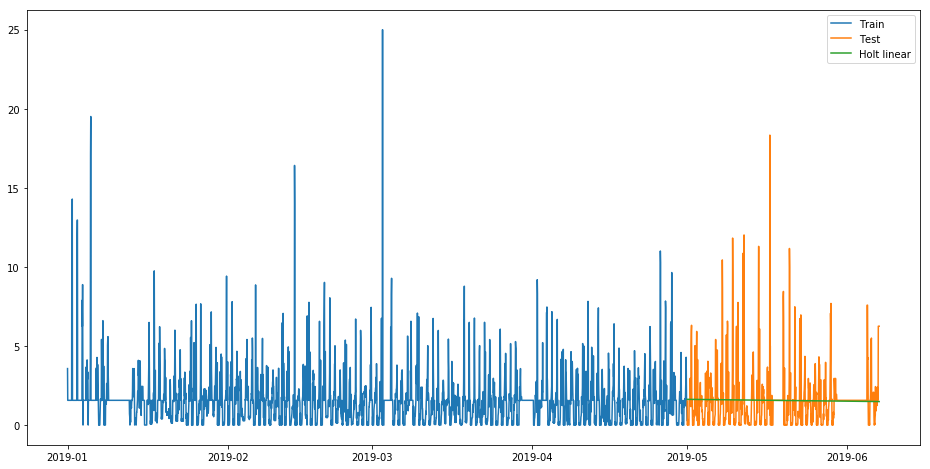

In [13]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

train = train.fillna(test.mean())

y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['KW'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['KW'], label='Train')
plt.plot(test['KW'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt linear')
plt.legend(loc='best')
plt.show()


In [14]:
rms = sqrt(mean_squared_error(test.KW, y_hat_avg.Holt_linear))
print(rms)

model_errors['Holt Linear']=rms


1.8280478265108002


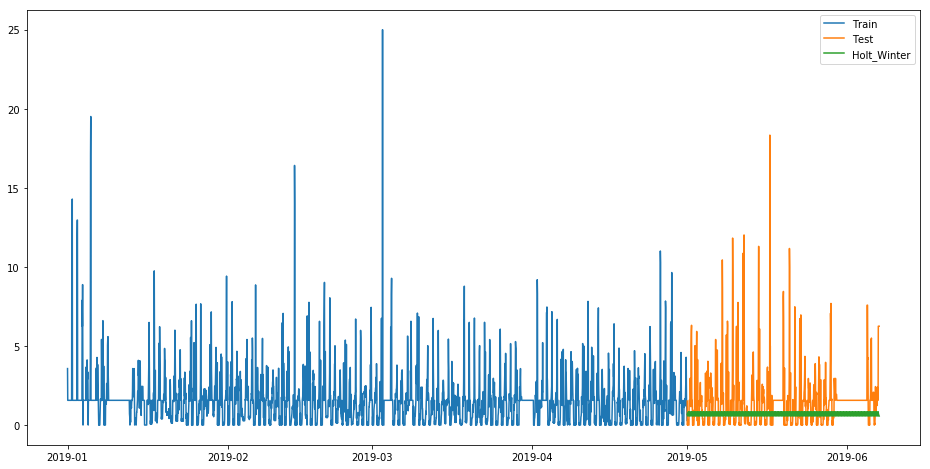

In [15]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['KW']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['KW'], label='Train')
plt.plot(test['KW'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [16]:
rms = sqrt(mean_squared_error(test.KW, y_hat_avg.Holt_Winter))
print(rms)

model_errors['Holt Winter']=rms


2.0322491158301306


In [17]:
import pmdarima as pm
import datetime

arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      seasonal=True,m=24)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 24); AIC=9659.824, BIC=9707.545, Fit time=47.398 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 24); AIC=10914.238, BIC=10926.169, Fit time=0.061 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 24); AIC=10688.232, BIC=10712.093, Fit time=3.823 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 24); AIC=10564.202, BIC=10588.062, Fit time=5.861 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 1, 24); AIC=10092.250, BIC=10134.006, Fit time=57.729 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 0, 1, 24); AIC=9742.940, BIC=9796.627, Fit time=175.190 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 0, 24); AIC=10048.653, BIC=10090.410, Fit time=49.828 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 2, 24); AIC=9665.408, BIC=9719.094, Fit time=205.481 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 24); AIC=10201.165, BIC=10236.956, Fit time=5.764 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 0, 2, 24); AIC=9649.715, BIC=9709.367, Fit time=229.246 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 2) seasonal_order=(2, 0, 2, 24); AIC=9667.160, BIC=9720.847, Fit time=202.863 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(2, 0, 2, 24); AIC=9660.351, BIC=9725.968, Fit time=239.542 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(2, 1, 1) seasonal_order=(2, 0, 2, 24); AIC=9654.484, BIC=9708.171, Fit time=185.257 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(2, 0, 2, 24); AIC=9711.100, BIC=9776.717, Fit time=298.540 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 2, 24); AIC=9701.551, BIC=9749.272, Fit time=231.244 seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(2, 0, 2, 24); AIC=9694.624, BIC=9766.207, Fit time=429.098 seconds
Total fit time: 2366.975 seconds


1000


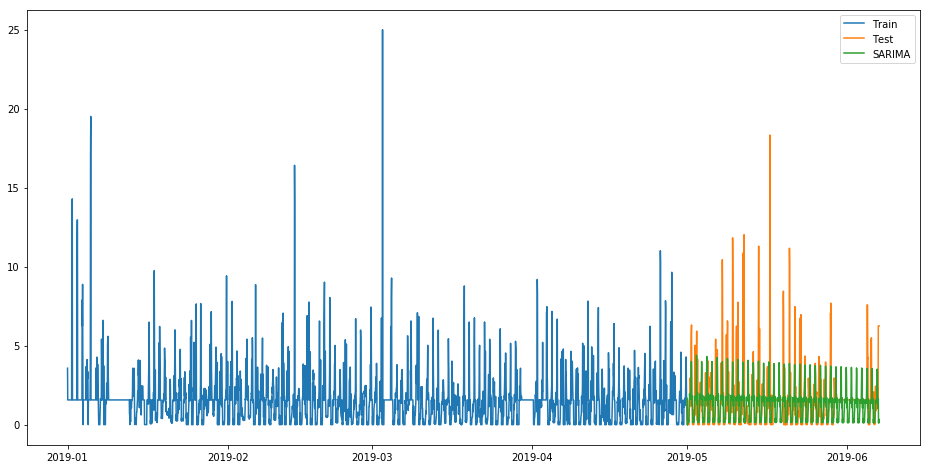

In [20]:
predicted_val=arima.predict(n_periods=1000)
predicted_df = test.copy()

print(len(predicted_val))

for i in range(len(predicted_df)):
    predicted_df['KW'][i]=predicted_val[i]


plt.figure(figsize=(16,8))
plt.plot( train['KW'], label='Train')
plt.plot(test['KW'], label='Test')
plt.plot(predicted_df, label='SARIMA')
plt.legend(loc='best')
plt.show()

In [21]:
rms = sqrt(mean_squared_error(test.KW, predicted_df.KW))
print(rms)

model_errors['SARIMA']=rms

1.5690641134178311


In [22]:
for index in model_errors:
    print(index+' : '+str(model_errors[index]))

Naive : 2.225282433683661
Average : 1.8256127142233103
Moving Average : 1.8444140443903354
Holt Linear : 1.8280478265108002
Holt Winter : 2.0322491158301306
SARIMA : 1.5690641134178311
